In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as sts
import scipy
import math
import itertools
from scipy.special import zeta
from math import pi, sin, cos, sqrt, exp, log
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym

In [ ]:
df = pd.read_table('IB_statistics_data_HW2.2.txt',sep='\s+', engine='python')

In [ ]:
df

,Ex2y,Ex2x_1,Ex2x_2,Ex2x_3,Ex3y,Ex3x_1,Ex3x_2,Ex3x_3,Ex4y,Ex4x_1,Ex4x_2,Ex4x_3
0,11.779709,2.238058,-2.117842,7.591641,1.472875,-1.225138,0.324756,2.903418,-0.739363,1.817163,0.869321,-1.485678
1,37.869892,5.238762,2.228369,30.169855,-0.229639,-1.179367,0.450903,2.969253,-1.053411,1.018622,1.655984,-0.858570
2,-1.162552,-1.520715,1.806218,2.464060,3.795338,-2.065337,-0.093577,4.348051,-2.063025,-1.505420,-0.579106,-1.204961
3,7.385868,-4.963934,4.312447,22.736075,3.827182,-0.686351,-0.148885,4.975753,0.957589,2.259538,0.608048,-1.291927
4,5.038211,-4.431453,1.828426,17.568318,1.518365,-1.364514,-0.240335,1.272145,1.166101,1.497247,0.445827,0.363464
...,...,...,...,...,...,...,...,...,...,...,...,...
112,2.910951,0.906018,-0.903098,0.950916,-2.262182,-1.231942,0.111479,1.542968,0.504260,-3.640539,-1.889271,2.695750
113,-3.798423,-0.188440,3.421138,0.454254,0.516395,-1.702807,0.725088,3.378367,0.900330,-0.678026,-1.180846,0.453610
114,31.371885,4.648199,1.733447,23.914670,0.446687,-1.266143,-0.057781,1.211333,-1.261142,1.249369,0.265283,-2.231159
115,41.791649,5.551700,0.187878,32.006668,1.404410,-1.450281,-0.348682,4.227757,-1.132881,-2.966789,-1.221617,1.160693


## Задача 2.

In [ ]:
n = 117
m = 3
alpha = 0.95

In [ ]:
y = df['Ex2y'].to_numpy()
X = df.loc[:, 'Ex2x_1':'Ex2x_3'].to_numpy()

Получим все необходимые статистики. Найдем квантиль распределения Фишера, посчитаем выборочную дисперсию, найдем оценку для вектора beta и матрицу ковариаций.

In [ ]:
F = sts.f.ppf(q = alpha, dfn = m, dfd = n - m, loc=0, scale=1)
s = np.var(y)
K = X.T @ X
beta = np.linalg.inv(K) @ X.T @ y
V = s * np.linalg.inv(X.T @ X)

Воспользуемся sympy для получения уравнения эллипсоида. Построим формулу согласно лекции 15 (слайд 4).

In [ ]:
xs, ys, zs = sym.symbols('x, y, z')
Ks = sym.Matrix(K)
betas = sym.Matrix(beta)
Xs = sym.Matrix([xs, ys, zs])
ellipsodes = (Ks * (Xs - betas)).T * (Xs - betas)
ellipsodes

Matrix([[(x - 1.95164180241247)*(1437.44041471933*x - 375.353347099903*y + 3909.91191600354*z - 7127.79878542828) + (y + 1.0780783911007)*(-375.353347099903*x + 730.15055346893*y + 633.81985806376*z + 884.62117340872) + (z - 1.002009696181)*(3909.91191600354*x + 633.81985806376*y + 39377.5851492761*z - 46404.1621779618)]])

Проекции доверительного эллипсоида.

In [ ]:
sym.simplify(((betas[0] - 1.95164180241247) * (1437.44041471933 * betas[0] - 375.353347099903 * ys
                           + 3909.91191600354 * zs - 7127.79878542828) + ( ys + 1.0780783911007) * 
                           (-375.353347099903 * betas[0] + 730.15055346893 * ys + 633.81985806376 * zs +
                            884.62117340872) + (zs - 1.002009696181) * (3909.91191600354 * betas[0] + 
                            633.81985806376 * ys + 39377.5851492761 * zs - 46404.1621779618) - (m / (n - m)) * F * s))

730.15055346893*y**2 + 1267.63971612752*y*z + 304.131781066229*y + 39377.5851492761*z**2 - 77546.8292778772*z + 38989.7109391515

In [ ]:
sym.simplify(((xs - 1.95164180241247) * (1437.44041471933 * xs - 375.353347099903 * betas[1]
                + 3909.91191600354 * zs - 7127.79878542828) + (betas[1] + 1.0780783911007) * 
                (-375.353347099903 * xs + 730.15055346893 * betas[1] + 633.81985806376 * zs +
                884.62117340872) + (zs - 1.002009696181) * (3909.91191600354 * xs + 
                633.81985806376 * betas[1] + 39377.5851492761 * zs - 46404.1621779618) 
              - (m / (n - m)) * F * s))

1437.44041471933*x**2 + 7819.82383200708*x*z - 13446.2769057851*x + 39377.5851492761*z**2 - 94174.9393415816*z + 60277.6937931144

In [ ]:
sym.simplify(((xs - 1.95164180241247) * (1437.44041471933 * xs - 375.353347099903 * ys
                + 3909.91191600354 * betas[2] - 7127.79878542828) + (ys + 1.0780783911007) * 
                (-375.353347099903 * xs + 730.15055346893 * ys + 633.81985806376 * betas[2] +
                884.62117340872) + (betas[2] - 1.002009696181) * (3909.91191600354 * xs + 
                633.81985806376 * ys + 39377.5851492761 * betas[2] - 46404.1621779618)
             - (m / (n - m)) * F * s))

1437.44041471933*x**2 - 750.706694199806*x*y - 6420.05826875817*x + 730.15055346893*y**2 + 3039.42963364135*y + 7877.63331654743

Доверительный параллелепипед. Для его построения воспользуемся квантилем распределения Стьюдента аналогично прошлой домашней работе.

In [ ]:
t = sts.t.ppf(q = 1 - alpha/m, df = n- m-1 , loc=0, scale=1)
a1, b1 = [beta[0] - t * sqrt(V[0][0]),  beta[0] + t * sqrt(V[0][0])]
a2, b2 = [beta[1] - t * sqrt(V[1][1]),  beta[1] + t * sqrt(V[1][1])]
a3, b3 = [beta[2] - t * sqrt(V[2][2]),  beta[2] + t * sqrt(V[2][2])]

In [ ]:
print('Параметры доверительного параллелепипеда (координаты начала и конца каждой из сторон)')
print(a1, b1)
print(a2, b2)
print(a3, b3)

Параметры доверительного параллелепипеда (координаты начала и конца каждой из сторон)
1.6263050526917087 2.276978552133231
-1.470826814642673 -0.6853299675587192
0.9437647823039906 1.060254610058013


Для построения всех эллипсов и прямоугольников воспользуемся desmos. Точки на графиках -- значения оценок (beta_i, beta_j). Ссылка на формулы https://www.desmos.com/calculator/40znhkeiyc.

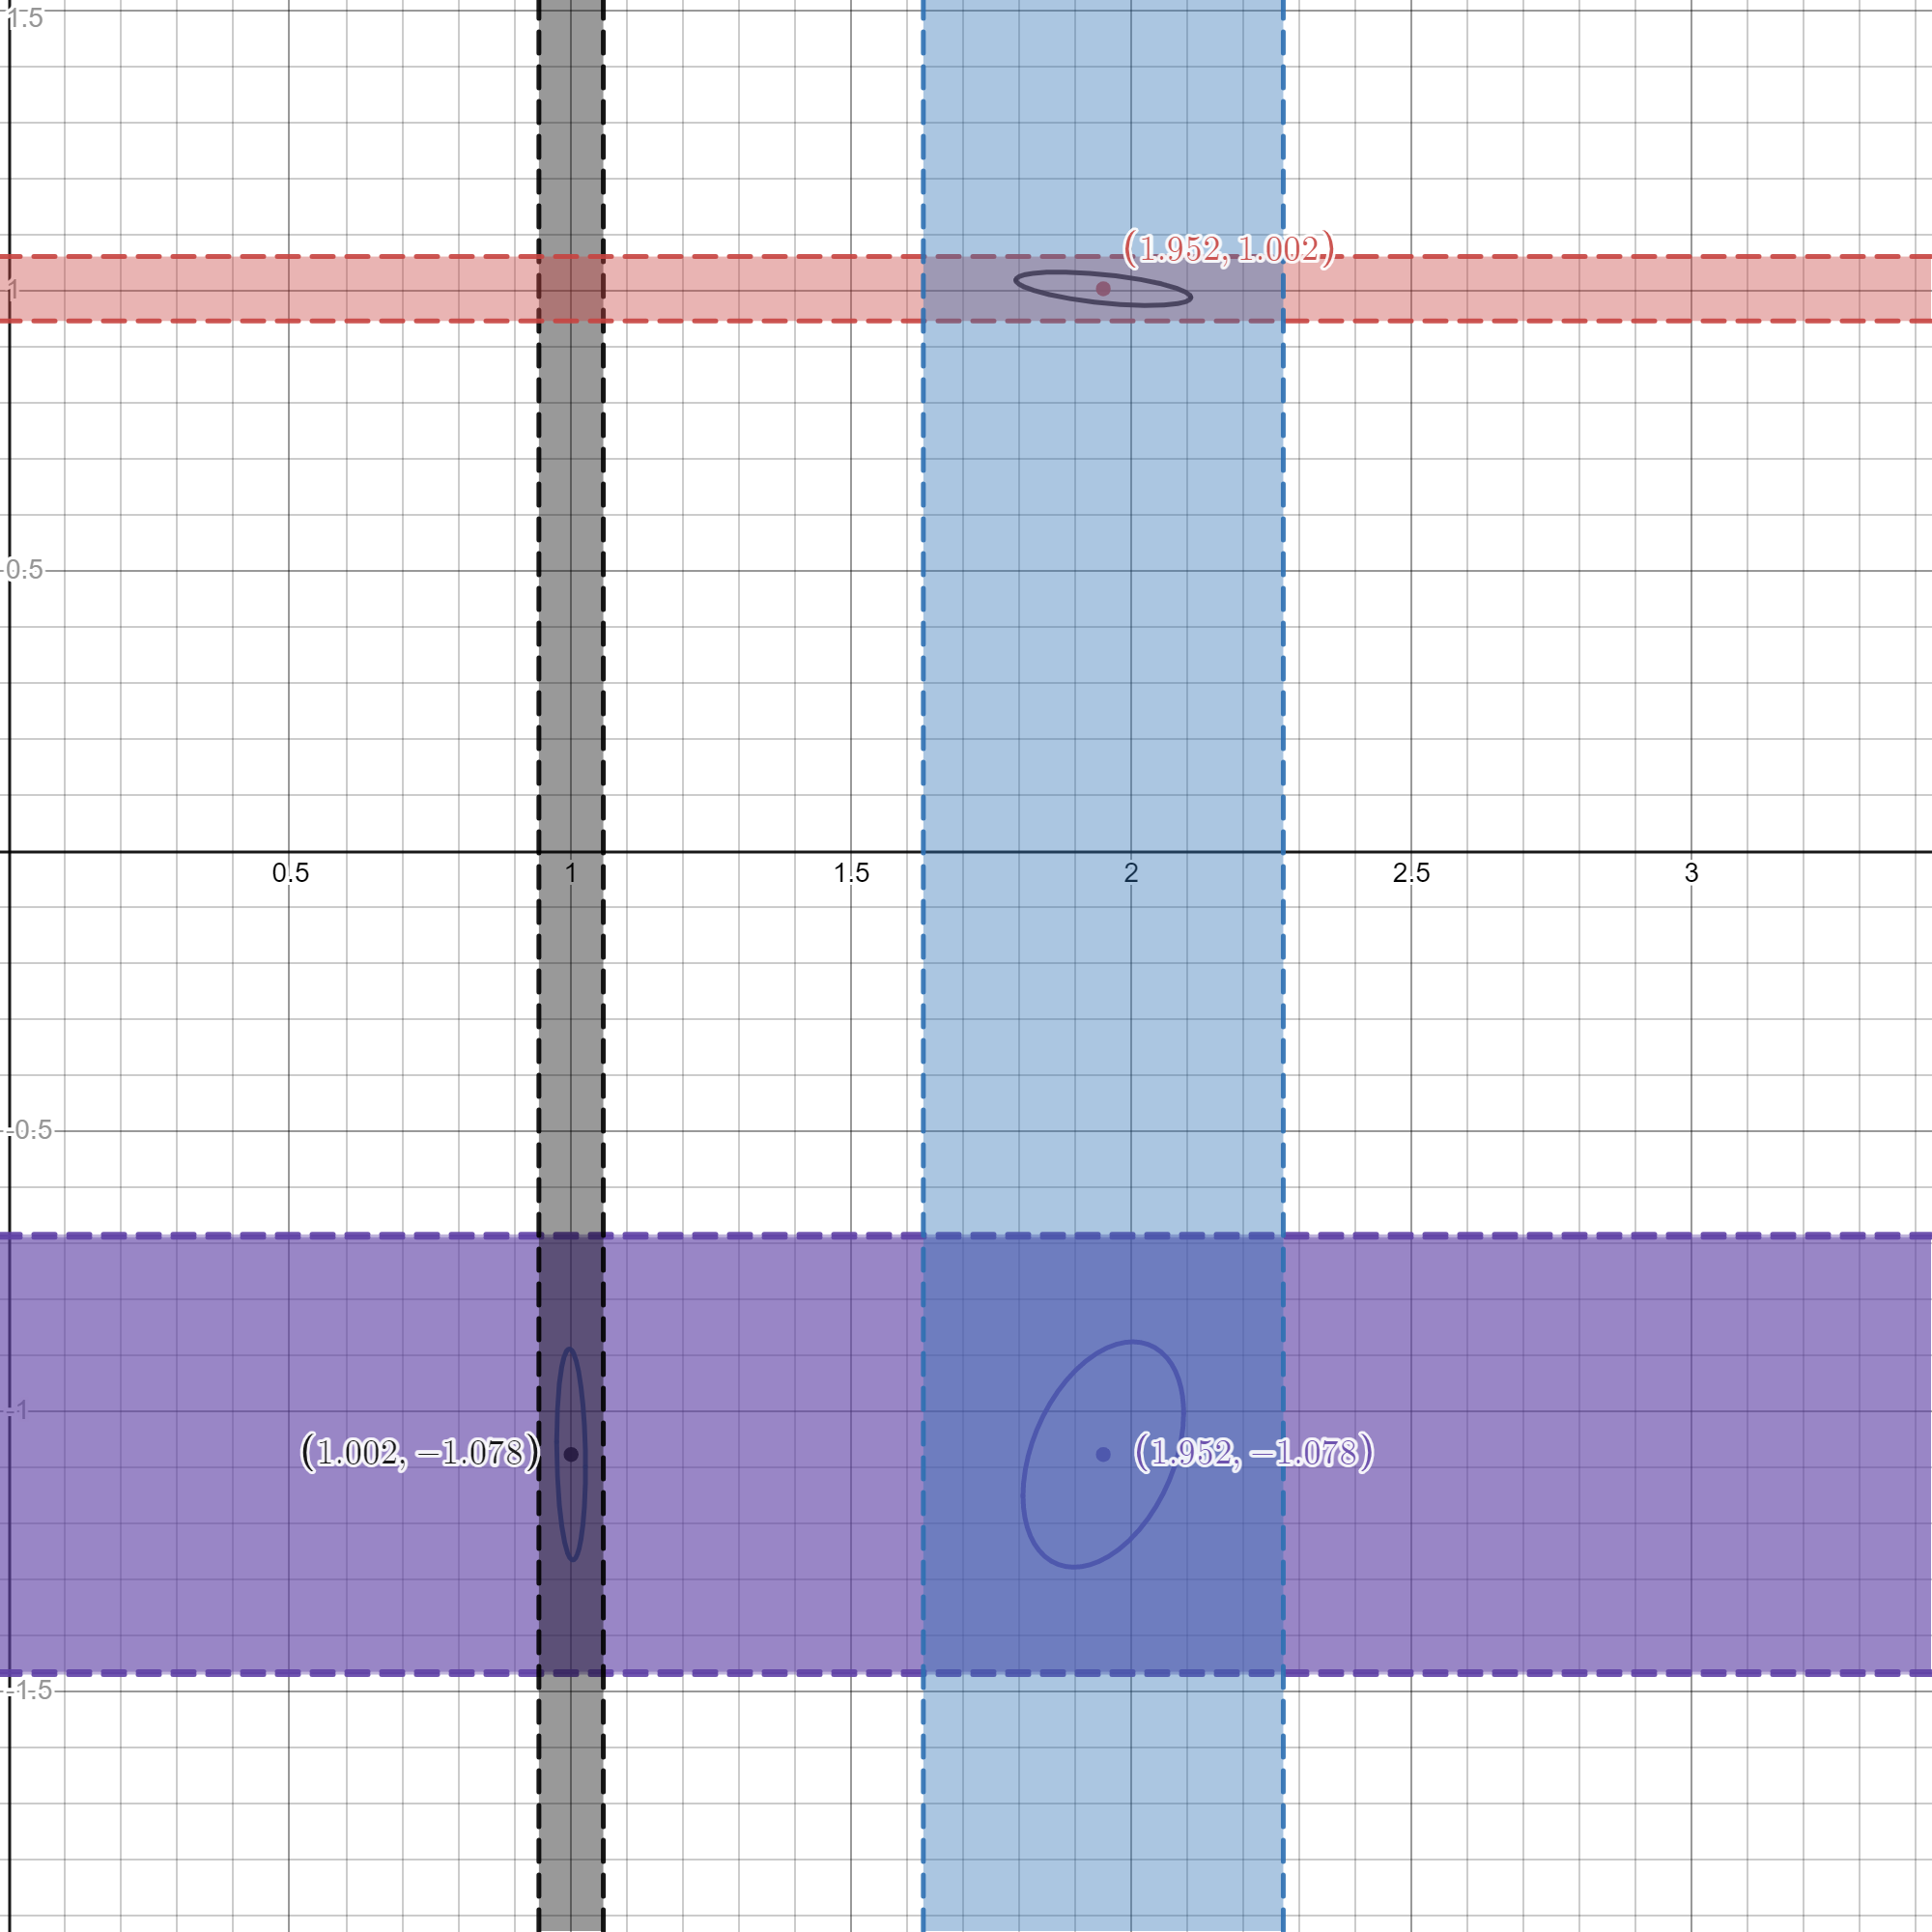

## Задача 3.

In [ ]:
y = df['Ex3y'].to_numpy()
X = df.loc[:, 'Ex3x_1':'Ex3x_3'].to_numpy()

In [ ]:
K = X.T @ X
beta = np.linalg.inv(K) @ X.T @ y
eps = (y - X @ beta) ** 2
k = len(y) - len(X.T) - 1
sigma = sum(eps) / k
print(f'Оценка для параметра beta равна', beta, '\nОценка для параметра sigma^2 равна', sigma)

Оценка для параметра beta равна [ 0.90085863 -0.54830388  1.00650776] 
Оценка для параметра sigma^2 равна 1.3642931243023027


Применим критерий Шапиро-Уилка для проверки гипотезы о нормальности ошибок.

In [ ]:
shapiro_test = sts.shapiro(y - X @ beta)
shapiro_test

ShapiroResult(statistic=0.9885640740394592, pvalue=0.4339505136013031)

Поскольку pvalue=0.4339505136013031 > alpha=0.05, нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05, значит ошибки нормальны.

Вычислим выборочный множественный коэффициент корреляции.

In [ ]:
ym = np.mean(y)
eps1 = (y - X @ beta) ** 2
eps2 = (y - ym) ** 2
r = sqrt(1 - sum(eps1) / sum(eps2))

In [ ]:
print('Выборочный множественный коэффициент корреляции равен', r)

Выборочный множественный коэффициент корреляции равен 0.6040075010715917


In [ ]:
V = sigma * np.linalg.inv(X.T @ X)
T = [beta[0] / sqrt(V[0][0]), beta[1] / sqrt(V[1][1]), beta[2] / sqrt(V[2][2])]
t = sts.t.ppf(q=1-alpha/2, df=k, loc=0, scale=1)
print('Статистики равны', T[0], T[1], T[2])
print('Доверительный интервал для T равен (', -t, ',', t, ')')
for i in range(3):
    if (-t <= T[i] and T[i] <= t):
        print(f'Нет оснований отклонить H_0: beta{i + 1} = 0 в пользу H_1 с уровнем значимости {alpha}')
    else:
        print(f'Есть основания отклонить H_0: beta{i + 1} = 0 в пользу H_1 с уровнем значимости {alpha}')
    print('Значение p-value равно', 1 - sts.t.cdf(x=T[i], df=k, loc=0, scale=1))

Статистики равны 5.833798121866761 -1.8387606554484346 10.994529837410566
Доверительный интервал для T равен ( -0.06284621025844016 , 0.06284621025844016 )
Есть основания отклонить H_0: beta1 = 0 в пользу H_1 с уровнем значимости 0.95
Значение p-value равно 2.626472284106285e-08
Есть основания отклонить H_0: beta2 = 0 в пользу H_1 с уровнем значимости 0.95
Значение p-value равно 0.965711866412559
Есть основания отклонить H_0: beta3 = 0 в пользу H_1 с уровнем значимости 0.95
Значение p-value равно 0.0


## Задача 4. 

In [ ]:
y = df['Ex4y'].to_numpy()
X = df.loc[:, 'Ex4x_1':'Ex4x_3'].to_numpy()

In [ ]:
K = X.T @ X
beta = np.linalg.inv(K) @ X.T @ y
print(f'Оценка для параметра beta равна', beta)

Оценка для параметра beta равна [ 1.07030233 -0.97649093  1.08988959]


In [ ]:
ym = np.mean(y)
eps1 = (y - X @ beta) ** 2
eps2 = (y - ym) ** 2
r = sqrt(1 - sum(eps1) / sum(eps2))
print('Выборочный множественный коэффициент корреляции равен', r)

Выборочный множественный коэффициент корреляции равен 0.9500214724063701


In [ ]:
eps = (y - X @ beta) ** 2
k = len(y) - len(X.T) - 1
sigma = sum(eps) / k
V = sigma * np.linalg.inv(X.T @ X)
T = [beta[0] / sqrt(V[0][0]), beta[1] / sqrt(V[1][1]), beta[2] / sqrt(V[2][2])]
t = sts.t.ppf(q=1-alpha/2, df=k, loc=0, scale=1)
print('Статистики равны', T[0], T[1], T[2])
print('Доверительный интервал для T равен (', -t, ',', t, ')')
for i in range(3):
    if (-t <= T[i] and T[i] <= t):
        print(f'Нет оснований отклонить H_0: beta{i + 1} = 0 в пользу H_1 с уровнем значимости {alpha}')
    else:
        print(f'Есть основания отклонить H_0: beta{i + 1} = 0 в пользу H_1 с уровнем значимости {alpha}')
    print('Значение p-value равно', 1 - sts.t.cdf(x=T[i], df=k, loc=0, scale=1))

Статистики равны 24.113575429566655 -19.878614519351427 26.586310848944414
Доверительный интервал для T равен ( -0.06284621025844016 , 0.06284621025844016 )
Есть основания отклонить H_0: beta1 = 0 в пользу H_1 с уровнем значимости 0.95
Значение p-value равно 0.0
Есть основания отклонить H_0: beta2 = 0 в пользу H_1 с уровнем значимости 0.95
Значение p-value равно 1.0
Есть основания отклонить H_0: beta3 = 0 в пользу H_1 с уровнем значимости 0.95
Значение p-value равно 0.0


Для проверки гипотезы о равенстве множественного коэффициента корреляции нулю будем использовать теорему из лекции  распределениии оценки множественного коэффициента корреляции при истинности H_0 : множественный коэффициент корреляции равен 0.

In [ ]:
B1 = sts.beta.ppf(q = (1 - alpha)/2, a = (m - 1) / 2, b = (n - m) / 2, loc=0, scale=1)
B2 = sts.beta.ppf(q = 1 - (1  - alpha) / 2, a = (m - 1) / 2, b = (n - m) / 2, loc=0, scale=1)
print('Доверительный интервал', '(', B1, B2, ')')
if (B1 <= r and r <= B2):
    print(f'Нет оснований отклонить H_0: r = 0 в пользу H_1 с уровнем значимости {alpha}')
else:
    print(f'Есть основания отклонить H_0: r = 0 в пользу H_1 с уровнем значимости {alpha}')
print('Значение p-value равно', 1 - sts.beta.cdf(x=r,  a = (m - 1) / 2, b = (n - m) / 2, loc=0, scale=1))

Доверительный интервал ( 0.00044407344008939273 0.06266748091448493 )
Есть основания отклонить H_0: r = 0 в пользу H_1 с уровнем значимости 0.95
Значение p-value равно 0.0


## Задача 6.

Сгенерируем три выборки.

In [ ]:
def generate(n):
    u = sts.uniform.rvs(loc=0, scale=1, size=n, random_state=None)
    w = sts.uniform.rvs(loc=0, scale=1, size=n, random_state=None)
    
    random_xi, random_zeta = [], []
    
    for v in u:
        if v < 1/3:
            random_xi.append(1)
        else:
            random_xi.append(-1)
            
    for v in u:
        if v < 1/5:
            random_zeta.append(0)
        elif v < 2/5:
            random_zeta.append(1)
        elif v < 3/5:
            random_zeta.append(2)
        elif v < 4/5:
            random_zeta.append(3)
        else:
            random_zeta.append(4)
            
    random_eta = 2 * random_xi
    
    return random_xi, random_eta, random_zeta

In [ ]:
xi, eta, zeta = generate(100)

## Задача 9.

Моделируем произвольные положительные возрастающие последовательности объема 50.

In [ ]:
n = 50
x1 = np.linspace(start=0.45, stop=8.25, num=n, endpoint=True)
x2 = np.linspace(start=0.55, stop=9.15, num=n, endpoint=True)

Выбираем произвольный вектор бета.

In [ ]:
beta = [-0.95364521, -0.54838591, -0.06291417]

Генерируем последовательность ошибок и последовательность у.

In [ ]:
f = lambda i : beta[0] * exp(beta[1] * i) * (x1[i] ** beta[2]) * (x2[i] ** (1 - beta[2])) * exp(e[i])

e = sts.norm.rvs(loc=0, scale=1, size=n, random_state=None)
y = np.array([f(i) for i in range(n)])

Построим оценки y для первой модели линейной регрессии.

In [ ]:
f1 = lambda i : x2[i] * exp(beta[0] + beta[1] * i + beta[2] * log(x1[i] / x2[i]) + e[i])
f2 = lambda i : exp(beta[0] + beta[1] * i + e[i])

y1 = np.array([f1(i) for i in range(n)])
y2 = np.array([f2(i) for i in range(n)])

Посчитаем коэффициенты детерминации.

In [ ]:
my = np.mean(y)

ss = lambda i : (y[i] - my) ** 2
ss1 = lambda i : (y1[i] - my) ** 2
ss2 = lambda i : (y2[i] - my) ** 2

s = np.array([ss(i) for i in range(n)])
s1 = np.array([ss1(i) for i in range(n)])
s2 = np.array([ss2(i) for i in range(n)])

r1 = np.sum(s1) / np.sum(s)
r2 = np.sum(s2) / np.sum(s)

print('Коэффициенты детерминации равны:', '\nr1 = ', r1, '\nr2 = ', r2)
if r1 < r2:
    print('При этом r1 < r2')

Коэффициенты детерминации равны: 
r1 =  0.22067562596023668 
r2 =  0.6066283512865156
При этом r1 < r2


Выборка, на которой достигается неравенство коэффициентов детерминации.

In [ ]:
dataset = pd.DataFrame(np.array([x1, x2, y]).transpose(), columns = ['x1', 'x2', 'y'])
dataset

,x1,x2,y
0,0.450000,0.550000,-2.642961e-01
1,0.609184,0.725510,-8.053258e-01
2,0.768367,0.901020,-6.708731e-01
3,0.927551,1.076531,-1.471145e-01
4,1.086735,1.252041,-2.198727e+00
5,1.245918,1.427551,-6.782582e-02
6,1.405102,1.603061,-1.415532e-02
7,1.564286,1.778571,-3.600150e-03
8,1.723469,1.954082,-1.570567e-02
9,1.882653,2.129592,-2.639212e-02
